<a href="https://colab.research.google.com/github/Sulfikar4424/mini_PROJECT/blob/main/doc_summ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!!unzip \*.zip && rm \*.zip

['unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.',
 '',
 'No zipfiles found.']

In [2]:
pip install PyPDF2

     |████████████████████████████████| 77 kB 5.0 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61102 sha256=e4b6df17bdb49a9262f98ba93432518200ee9becfad04356ceec941cd1163b28
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2


In [3]:
pip install docx2txt

  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3980 sha256=c7c15aeb12649764f571aac4168d1031c801f9e5c0d018a34fe3e66450c6d366
  Stored in directory: /root/.cache/pip/wheels/b7/20/b2/473e3aea9a0c0d3e7b2f7bd81d06d0794fec12752733d1f3a8
Successfully built docx2txt


In [4]:
import numpy as np
import PyPDF2
import docx2txt
import sys

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import networkx as nx

In [7]:
from nltk.tokenize.punkt import PunktSentenceTokenizer

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [9]:
# we are going to show an example of how the method is working
# first let's take the document as an input
def readDoc():
    name = input('Please input a file name: ') 
    print('You have asked for the document {}'.format(name))

    # now read the type of document
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
        # print(name)
    print(choice)
    # Case 1: if it is a .txt file
        
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
            
    # Case 2: if it is a .pdf file
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    # Case 3: none of the format
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(document))
    return document

In [10]:
# the function used for tokenizing the sentences
# tokenization of a sentence: '''provided in cell() above'''

def tokenize(document):
    # We are tokenizing using the PunktSentenceTokenizer
    # we call an instance of this class as sentence_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: takes our document as input and returns a list of all the sentences in the document
    
    # sentences is a list containing each sentence of the document as an element
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

In [11]:
# reading a file and 
# printing the size of the file
document = readDoc()
print('The length of the file is:', end=' ')
print(len(document))

Please input a file name: essay.pdf
You have asked for the document essay.pdf
2
<class 'str'>
The length of the file is: 3289


In [12]:
# we want to tokenize the document for further processing
# tokenizing the sentence means that we are creating a list of all the sentences of the document.
# Need of tokenizing the document: Initially the document is in just a string format.
# if we want to process the document, we need to store it in a data structure.
# Tokenization of document into words is also possible, but we will go with the tokenizing with the sentences
# Since we want to choose the most relevant sentences, we need to generate tokens of sentences only
sentences_list = tokenize(document)

# let us print the size of memory used by the list sentences
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))

# the size of one of the element of the list
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

The size of the list in Bytes is: 376
The size of the item 0 in Bytes is: 172


In [13]:
# let us see the data type of sentences_list
# It will be list
print(type(sentences_list))

<class 'list'>


In [14]:
#let us analyse the elements of the sentences
# len() method applies on the list and provides the number of elements in the list
print('The size of the list "sentences" is: {}'.format(len(sentences_list)))

The size of the list "sentences" is: 29


In [15]:
# print the elements of the list
# If the input document is long, which on realistically will be wrong, we would not like to print the entire document
for i in sentences_list:
    print(i)

Example Five-Paragraph Essay (on the advantages of five-paragraph model)
I love using the five-paragraph model for writing.
I can find three points to argue for or exemplify just about 
any topic imaginable.
Cats are good pets because theyÕre good companions, theyÕre clean, and theyÕre easy to 
care for.
Jaws
 is a classic film because of its acting, its cinematography, and its musical score.
Three examples 
of the U.S.
governmentÕs checks and balances are its executive branch, its legislative branch, and its judicial 
branches.
The five-paragraph model is a valuable tool for many writing situations because it structures my 
writing, it aids my readers, and it is versatile.
One advantage of the five-paragraph model is that it structures what I write.
Before I learned the five-paragraph 
recipe, IÕd either stare at a blank screen or IÕd write one big block of text; now, I know to first identify three 
examples, reasons, or other supporting pieces of evidence.
Then, I develop those three

In [16]:
# Convert a collection of text documents to a matrix of token counts
# fit_transform method of CountVectorizer() class 
# Learn the vocabulary dictionary and return term-document matrix. 
# I/p: An iterable which yields either str, unicode or file objects.
# O/p: The term-document matrix named cv_matrix
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [17]:
# printing the cv_matrix type
# and how it is being stored in memory?
# it is stored in the compressed row format
# compressed row format: 
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names())
print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse.csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <29x221 sparse matrix of type '<class 'numpy.int64'>'
	with 465 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 64
['100', '1000', '2007', '27', '400', '500', '5000', '75', 'able', 'about', 'acting', 'advantage', 'advantages', 'aids', 'all', 'an', 'analytical', 'and', 'anticipate', 'any', 'apply', 'are', 'argue', 'arguments', 'as', 'at', 'august', 'balances', 'based', 'batch', 'be', 'because', 'before', 'better', 'big', 'blank', 'block', 'boom', 'branch', 'branches', 'burden', 'by', 'can', 'care', 'cats', 'center', 'checks', 'cinematography', 'classic', 'clean', 'clearly', 'companions', 'components', 'conclude', 'conclusion', 'conclusions', 'considerably', 'current', 'day', 'develop', 'docs', 'double', 'doubled', 'dr', 'each', 'ease', 'easy', 'edu', 'either', 'essay', 'even', 'evidence', 'example', 'examples', 'executive', 'exemplify', 'fan'

In [18]:
# Tnormalized: document-term matrix normalized (value 0-1) according to the TF-IDF
# TF(Term Frequency): the no. of times a term(a word here) appears in the current document(single sentence here)
# IDF(Inverse Document Frequency): the no. of times a term(a word here) appears in the entire corpus
# Corpus: set of all sentences

normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.         0.         0.         ... 0.17156989 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.21677114 ... 0.24536807 0.21677114 0.21677114]]


In [19]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T
# plt.spy(res_graph)

<bound method _cs_matrix.toarray of <221x29 sparse matrix of type '<class 'numpy.float64'>'
	with 465 stored elements in Compressed Sparse Column format>>


Number of edges 347
Number of vertices 29


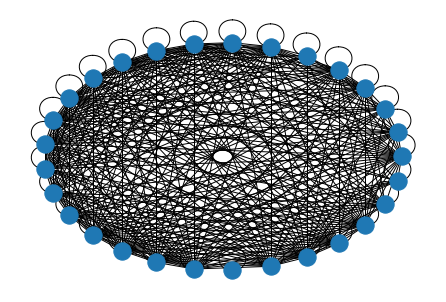

The memory used by the graph in Bytes is: 64


In [20]:
# drawing a graph to proceed for the textrank algorithm
# nx_graph is a graph developed using the networkx library
# each node represents a sentence
# an edge represents that they have words in common
# the edge weight is the number of words that are common in both of the sentences(nodes)
# nx.draw() method is used to draw the graph created

nx_graph = nx.from_scipy_sparse_matrix(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

In [21]:
# ranks is a dictionary with key=node(sentences) and value=textrank (the rank of each of the sentences)
ranks = nx.pagerank(nx_graph)

# analyse the data type of ranks
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print the dictionary
for i in ranks:
    print(i, ranks[i])

<class 'dict'>
The size used by the dictionary in Bytes is: 1192
0 0.04604164618003707
1 0.025618807154218146
2 0.02209683521965956
3 0.027049407801437865
4 0.0383263399054738
5 0.0240486990452172
6 0.04377251528959966
7 0.04217854991330641
8 0.034474335099828994
9 0.03276955138999628
10 0.03674124601358056
11 0.03371907230988055
12 0.05284012188643666
13 0.03553035573704847
14 0.034039408221725444
15 0.02816102378955661
16 0.03929482707969392
17 0.0359595683441634
18 0.03539868603717586
19 0.03969632751280931
20 0.034598609482160717
21 0.04336600427504425
22 0.034482758620689655
23 0.034732153855283
24 0.03239484620831906
25 0.03542032044609572
26 0.033160430305485315
27 0.02295916013339606
28 0.021128392742680635


In [22]:
# enumerate method: returns an enumerate object
# Use of list Comprehensions
# O/p: sentence_array is the sorted(descending order w.r.t. score value) 2-d array of ranks[sentence] and sentence 
# For example, if there are two sentences: S1 (with a score of S1 = s1) and S2 with score s2, with s2>s1
# then sentence_array is [[s2, S2], [s1, S1]]
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [23]:
# as sentence_array is in descending order wrt score value
# fmax is the largest score value(the score of first element)
# fmin is the smallest score value(the score of last element)

rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

In [35]:
# print the largest and smallest value of scores of the sentence
print(rank_max)
print(rank_min)

0.05284012188643666
0.021128392742680635


In [26]:
# Normalization of the scores
# so that it comes out in the range 0-1
# fmax becomes 1
# fmin becomes 0
# store the normalized values in the list temp_array

temp_array = []

# if all sentences have equal ranks, means they are all the same
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))

29


In [27]:
# Calculation of threshold:
# We take the mean value of normalized scores
# any sentence with the normalized score 0.2 more than the mean value is considered to be 
threshold = (sum(temp_array) / len(temp_array)) + 0.2

In [28]:
# Separate out the sentences that satiasfy the criteria of having a score above the threshold
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [29]:
model = sentence_list

In [30]:
# print(sentence_list)
summary = " ".join(str(x) for x in sentence_list)
print(summary)
# save the data in another file, names sum.txt
f = open('final3.txt', 'a+')
#print(type(f))
f.write('\n')
f.write(summary)
f.close

A related advantage of the five-paragraph model is that my following the recipe makes it easy for readers to 
follow my writing. Example Five-Paragraph Essay (on the advantages of five-paragraph model)
I love using the five-paragraph model for writing. The five-paragraph model is a valuable tool for many writing situations because it structures my 
writing, it aids my readers, and it is versatile. The five-paragraph 
model is versatile for all my writing needs. One advantage of the five-paragraph model is that it structures what I write.


<function TextIOWrapper.close>

In [31]:
for lines in sentence_list:
    print(lines)

A related advantage of the five-paragraph model is that my following the recipe makes it easy for readers to 
follow my writing.
Example Five-Paragraph Essay (on the advantages of five-paragraph model)
I love using the five-paragraph model for writing.
The five-paragraph model is a valuable tool for many writing situations because it structures my 
writing, it aids my readers, and it is versatile.
The five-paragraph 
model is versatile for all my writing needs.
One advantage of the five-paragraph model is that it structures what I write.


EVALUATION USING ROUGE

In [36]:
pip install git+https://github.com/tagucci/pythonrouge.git

  Cloning https://github.com/tagucci/pythonrouge.git to /tmp/pip-req-build-2i438od_
  Running command git clone -q https://github.com/tagucci/pythonrouge.git /tmp/pip-req-build-2i438od_
  Created wheel for pythonrouge: filename=pythonrouge-0.2-py3-none-any.whl size=285408 sha256=7ef979ae283a5a30daddbd43e76a20cde30b8d4c7c40d5111ddeb69114161b00
  Stored in directory: /tmp/pip-ephem-wheel-cache-z6qphly5/wheels/f2/28/1a/47e2c73d5e7d1d49296a991e19d774c97e4c2e98dbf027a515
Successfully built pythonrouge


In [32]:
!pip install rouge

In [37]:
!pip install pythonrouge

In [42]:
model_out = [sentence_list]
reference =[document]
rouge = Rouge()
# rouge.get_scores(model_out,reference)
score = rouge(article_text, summary)
print(score)

NameError: ignored